In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
iris = datasets.load_iris()

In [ ]:
X = iris.data[:100, 2:4]
y = iris.target[:100]

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
kernels = ['linear','poly','rbf','sigmoid']

In [ ]:
def plot_decision_boundary(X,y, model, kernel_name):
  h= 0.02
  x_min, x_max = X[:,0].min()-1, X[:,0].max() +1
  y_min, y_max = X[:,1].min()-1, X[:,1].max() +1
  xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min, y_max,h))
  Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx,yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
  plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm)
  plt.xlabel('Petal length')
  plt.ylabel('Petal width')
  plt.title(f'SVM with {kernel_name} kernel')
  plt.tight_layout()
  plt.show()


 -- Kernel: linear --
Accuracy is 1.00


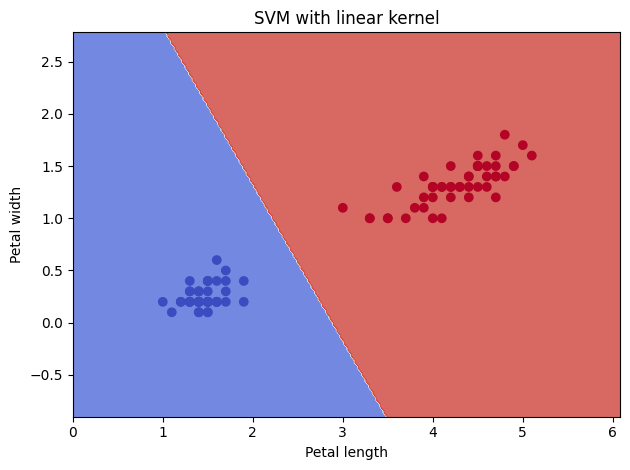


 -- Kernel: poly --
Accuracy is 1.00


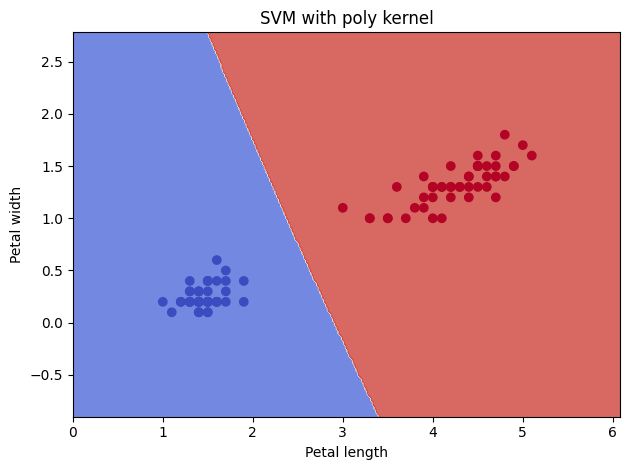


 -- Kernel: rbf --
Accuracy is 1.00


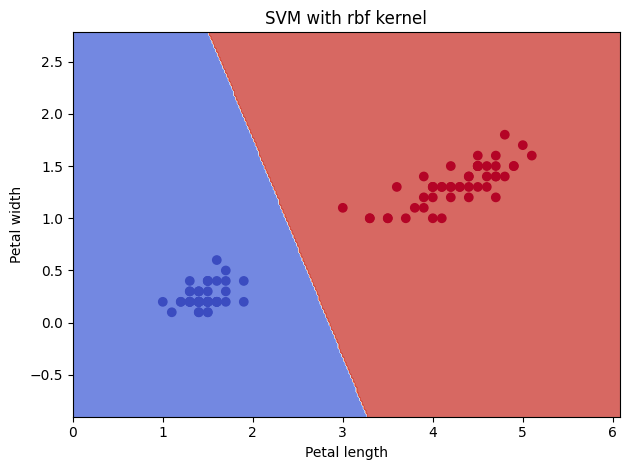


 -- Kernel: sigmoid --
Accuracy is 0.00


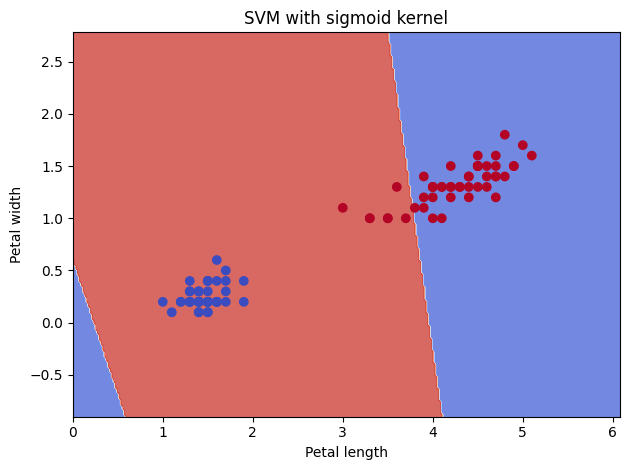

In [ ]:
for kernel in kernels:
  print(f"\n -- Kernel: {kernel} --")
  model = SVC(kernel=kernel, degree=2)
  model.fit(X_train,y_train)
  acc = model.score(X_test,y_test)
  print(f"Accuracy is {acc:.2f}")
  plot_decision_boundary(X,y, model, kernel)

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
iris =  datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size =0.2, random_state=42)

In [ ]:
param_grid = {
    'C': [0.1,1,10],
    'gamma': ['scale',0.01,0.1,1],
    'kernel': ['linear', 'rbf','poly']
}

In [ ]:
grid = GridSearchCV(SVC(), param_grid, refit=True,cv=5,verbose=1, n_jobs=1)
grid.fit(X_train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}


In [ ]:
y_pred = grid.predict(X_test)
print("acuuracy on test set:")
accuracy_score(y_test, y_pred)
print("Classification report:")
print(classification_report(y_test,y_pred, target_names = iris.target_names))

acuuracy on test set:
Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

